南昂汰 1922076

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os, sys

# PCV library path for importing
sys.path.append('/content/drive/MyDrive/Colab Notebooks/MU-Image-Speech-recognition/PCV-master')

# change directory to the execution home
os.chdir('/content/drive/MyDrive/Colab Notebooks/MU-Image-Speech-recognition/PCV-master/Test-program')

# 2.1 Harris corner detector

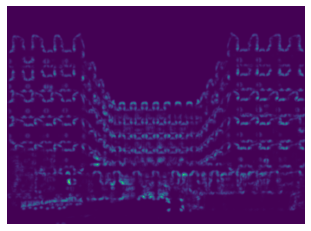

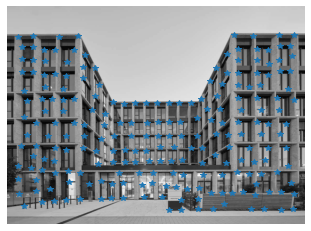

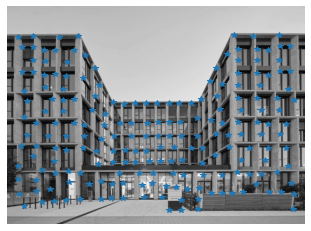

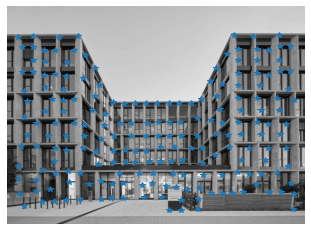

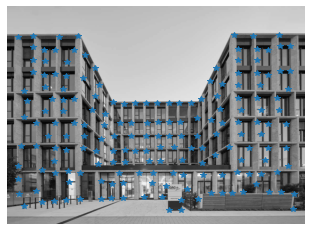

In [ ]:
from pylab import *
from numpy import *
from PIL import Image

from PCV.localdescriptors import harris

"""
Example of detecting Harris corner points (Figure 2-1 in the book).
"""

# open image
im = array(Image.open('/content/image1.jpg').convert('L'))

# detect corners and plot
harrisim = harris.compute_harris_response(im)
axis('off')
imshow(harrisim)

filtered_coords = harris.get_harris_points(harrisim, 40, threshold=0.01)
harris.plot_harris_points(im, filtered_coords)
# plot only 200 strongest
harris.plot_harris_points(im, filtered_coords[:200])

filtered_coords = harris.get_harris_points(harrisim, 40, threshold=0.05)
# plot only 200 strongest
harris.plot_harris_points(im, filtered_coords[:200])

filtered_coords = harris.get_harris_points(harrisim, 40, threshold=0.1)
# plot only 200 strongest
harris.plot_harris_points(im, filtered_coords[:200])

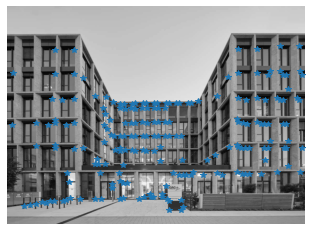

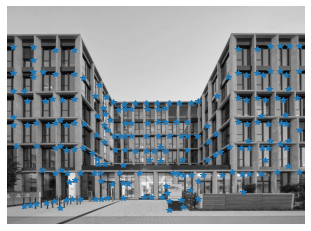

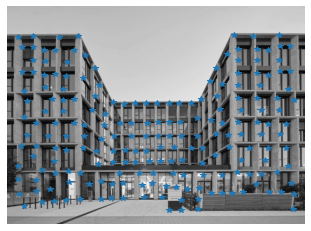

In [ ]:
filtered_coords = harris.get_harris_points(harrisim, 10, threshold=0.01)
# plot only 200 strongest
harris.plot_harris_points(im, filtered_coords[:200])

filtered_coords = harris.get_harris_points(harrisim, 20, threshold=0.01)
# plot only 200 strongest
harris.plot_harris_points(im, filtered_coords[:200])

filtered_coords = harris.get_harris_points(harrisim, 40, threshold=0.01)
# plot only 200 strongest
harris.plot_harris_points(im, filtered_coords[:200])

starting matching


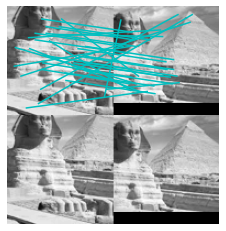

In [ ]:
## Finding corresponding points between images

from pylab import *
from numpy import *
from PIL import Image

from PCV.localdescriptors import harris
from PCV.tools.imtools import imresize

"""
This is the Harris point matching example in Figure 2-2.
"""

im1 = array(Image.open("/content/image2.jpg").convert("L"))
im2 = array(Image.open("/content/image3.jpg").convert("L"))

# resize to make matching faster
# do a integral division (//) instead of the floating point division (/)
im1 = imresize(im1,(im1.shape[1]//2,im1.shape[0]//2))
im2 = imresize(im2,(im2.shape[1]//2,im2.shape[0]//2))

wid = 5
harrisim = harris.compute_harris_response(im1,5) 
filtered_coords1 = harris.get_harris_points(harrisim,wid+1) 
d1 = harris.get_descriptors(im1,filtered_coords1,wid)

harrisim = harris.compute_harris_response(im2,5) 
filtered_coords2 = harris.get_harris_points(harrisim,wid+1) 
d2 = harris.get_descriptors(im2,filtered_coords2,wid)

print ('starting matching')
matches = harris.match_twosided(d1,d2)

figure()
gray() 
harris.plot_matches(im1,im2,filtered_coords1,filtered_coords2,matches) 
show()

# 2.2 SIFT  -  Scale-Invariant Feature Transform

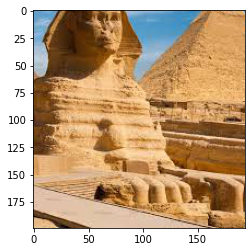

In [ ]:
im = array(Image.open('/content/image2.jpg')) # plot the image
imshow(im)

##***Followings are the code for using SIFT on Colab

https://colab.research.google.com/github/YoniChechik/AI_is_Math/blob/master/c_08_features/sift.ipynb#scrollTo=cZtbFASRNtfK

https://towardsdatascience.com/image-stitching-using-opencv-817779c86a83

In [ ]:
!pip install -U opencv-python

     |████████████████████████████████| 49.9 MB 17 kB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import cv2
print(cv2.__version__)

4.5.3


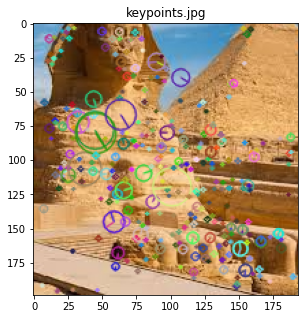

In [ ]:
import cv2

image1 = cv2.imread("/content/image2.jpg")
image2 = cv2.imread("/content/image3.jpg")
rgb_1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
gray_1 = cv2.cvtColor(rgb_1, cv2.COLOR_RGB2GRAY)
rgb_2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
gray_2 = cv2.cvtColor(rgb_2, cv2.COLOR_RGB2GRAY)

sift = cv2.SIFT_create()

# find the keypoints and descriptors with chosen feature_extractor
kp_1, desc_1 = sift.detectAndCompute(gray_1, None)
kp_2, desc_2 = sift.detectAndCompute(gray_2, None)

test = cv2.drawKeypoints(rgb_1, kp_1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(5,5))
plt.imshow(test)
plt.title("keypoints.jpg")
plt.show()

In [ ]:
desc_1[0]

array([ 26.,   7.,   1.,  17.,  68.,   6.,   1.,   1., 187.,  55.,   0.,
         2.,   3.,   1.,   0.,  10., 101.,  37.,   0.,   0.,   1.,   2.,
         0.,   5.,   3.,   4.,   1.,   0.,   3.,   6.,   3.,   2.,  25.,
         4.,   1.,  15.,  82.,  13.,   0.,   3., 187.,  33.,   0.,   2.,
         5.,   1.,   0.,  30., 162.,  15.,   0.,   0.,   0.,   0.,   0.,
        24.,  11.,  11.,   0.,   0.,   0.,   2.,   2.,   3.,  23.,   5.,
         0.,  12.,  84.,  18.,   1.,   0., 187.,  35.,   0.,   2.,   9.,
         1.,   0.,   7., 170.,  11.,   1.,   1.,   0.,   0.,   0.,   3.,
        12.,  14.,   0.,   0.,   0.,   0.,   0.,   0.,  14.,   5.,   1.,
        26.,  63.,   1.,   0.,   0., 187.,  49.,   2.,   7.,   9.,   0.,
         0.,   0., 134.,  17.,   0.,   0.,   1.,   0.,   0.,   0.,   6.,
         5.,   0.,   0.,   1.,   0.,   0.,   0.], dtype=float32)

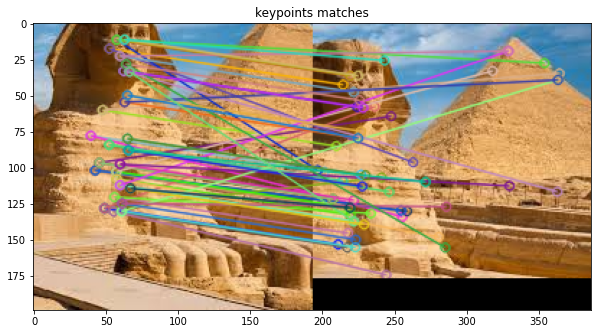

In [ ]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(desc_1, desc_2, k=2)

# Apply ratio test
good_and_second_good_match_list = []
for m in matches:
    if m[0].distance/m[1].distance < 0.5:
        good_and_second_good_match_list.append(m)
good_match_arr = np.asarray(good_and_second_good_match_list)[:,0]

# show only 30 matches
im_matches = cv2.drawMatchesKnn(rgb_1, kp_1, rgb_2, kp_2,
                                good_and_second_good_match_list[0:30], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(10, 10))
plt.imshow(im_matches)
plt.title("keypoints matches")
plt.show()